# Reading in Data, Merging Dataframes and Intro to GIS

### In this lesson, we will:
 - Learn about relative file paths (../data/*.csv)
 - Practice loading in datasets saved in different file formats (.csv, excel, .shp)
 - Learn the various ways to merge dataframes (concat, merge(left, right, outer, inner))
 - Practice Merging Diabetes Prevalence in the State of Texas Datasets on both County Name and FIPS codes
 - Be introduced to the geopandas package for mapping and merge datasets with Shapefiles to Map the Data they contain 

Let's begin by loading in all the relevant libraries we're going to use 

In [1]:
import pandas as pd
import csv
import numpy as np
import math
import os
from IPython.display import Image, display

In [2]:
import geopandas as gpd

import matplotlib.pyplot as plt

%matplotlib inline
from shapely.geometry import Point, Polygon
from geopandas import datasets, GeoDataFrame, read_file

/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Reading in Data and Relative File Paths

In order to read in datasets to turn them into dataframes (something that we did briefly last week) we need to know what format the data is saved in, what library or function to use to open that type of datafile, and where to direct the computer to find that data file. 

There are three different types of datafiles we are going to be working with today:
 - Comma Seperated Values files (.csv)
 - Excel files (.xlxs)
 - Shape files (.shp)

We are going to start by reading in the *.csv file in our tutorial directory's /data folder.

Currently, we are running our jupyter notebook file (.ipynb) from the scripts folder in the tutorial directory.

The full directory for our tutorial would look something like this
> "User/Documents/dataframe_merging_tutorial/scripts/dataframe_merging.ipynb"

In [3]:
# We can actually print our current working directory using the following code:
os.getcwd()

# Save the current working directory to an object
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Print the type of the returned object
print("os.getcwd() returns an object of type: {0}".format(type(cwd)))

Current working directory: /Users/jls8266/Documents/IC2 Miscellanous/df_merging_workshop/scripts
os.getcwd() returns an object of type: <class 'str'>


It is important to know what your current working directory is before beginning to code so that you know how to arrange your folder file structure and direct your code through this structure to the relevant files and scripts.

To direct your computer to relevant files in your directory's file structure, we are going to make use of relative file paths. While we could type out the full directory file path each time we want to call in a datafile from our directory, relative file paths allows us to start from our current notebook and work outwards. 

This is also helpful when you are sharing, or collaborating on, code with others so that each of your computers do not have to be set up completely the same way. Just the folder directory that you are coding within.

Instead of needing to write this whole filepath to get to our jupyter notebook
> "User/Documents/dataframe_merging_tutorial/scripts/dataframe_merging.ipynb"

We can instead use the __"../"__ syntax to essentially start from __"dataframe_merging.ipynb__ out of the __"scripts""__ folder, into the __"dataframe_merging_tutorial"__ folder and direct it to the __"data"__ folder.
> "../data

The __"../"__ syntax tells the computer to move up one folder level from the python notebook you are working in. You can use it twice to go two folder levels out to the __"Documents"__ folder, then add a __"/"__ and the name of a folder in your documents folder to go into.

You can use relative file paths to traverse your computer's entire file structure. We will be suing relative file paths to direct the computer towards the relevant data files we will be reading in. 

### Let's try reading in a .csv file
Use ../ to direct your computer to the data folder and the *.csv file inside.

Function Documentation: [Pandas.read_csv()](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

Read in County GDP .csv data from Bureau of Economic Analysis

Data Source: https://apps.bea.gov/iTable/iTable.cfm?reqid=70&step=1&acrdn=5

In [5]:
#Read in the BEA gdp data by county csv 
gdp = pd.read_csv('../data/GDP_TX_COUNTY_2001_2019.csv')

In [6]:
gdp

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""48000""",Texas,6.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1.021693e+09,1.042351e+09,...,1.301808e+09,1.343701e+09,1.410448e+09,1.470465e+09,1.518614e+09,1.595969e+09,1.606580e+09,1.651329e+09,1.715231e+09,1.764357e+09
1,"""48000""",Texas,6.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,7.243800e+01,7.390200e+01,...,9.229800e+01,9.526800e+01,1.000000e+02,1.042550e+02,1.076690e+02,1.131530e+02,1.139060e+02,1.170780e+02,1.216090e+02,1.250920e+02
2,"""48000""",Texas,6.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,7.729092e+08,7.877198e+08,...,1.237304e+09,1.331138e+09,1.410448e+09,1.500554e+09,1.568071e+09,1.564374e+09,1.567687e+09,1.665428e+09,1.795635e+09,1.843803e+09
3,"""48001""","Anderson, TX",6.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1.527623e+06,1.543492e+06,...,1.747707e+06,1.762332e+06,1.767923e+06,1.716334e+06,1.706746e+06,1.681229e+06,1.721880e+06,1.759551e+06,1.843816e+06,1.910774e+06
4,"""48001""","Anderson, TX",6.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,8.640800e+01,8.730500e+01,...,9.885700e+01,9.968400e+01,1.000000e+02,9.708200e+01,9.654000e+01,9.509600e+01,9.739600e+01,9.952600e+01,1.042930e+02,1.080800e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,"""48507""","Zavala, TX",6.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.330340e+05,1.456230e+05,...,2.311710e+05,2.862220e+05,5.694470e+05,7.997260e+05,8.640940e+05,6.654000e+05,5.549160e+05,5.995200e+05,6.367600e+05,6.329330e+05
765,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,CAGDP1: Gross Domestic Product (GDP) summary b...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,"Last updated: December 9, 2020 -- new statisti...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Get rid of reader and footer
gdp = gdp[3:765]

In [8]:
gdp

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,"""48001""","Anderson, TX",6.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1527623.000,1543492.000,...,1747707.000,1762332.000,1767923.0,1716334.000,1706746.000,1681229.000,1721880.000,1759551.000,1843816.000,1910774.000
4,"""48001""","Anderson, TX",6.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,86.408,87.305,...,98.857,99.684,100.0,97.082,96.540,95.096,97.396,99.526,104.293,108.080
5,"""48001""","Anderson, TX",6.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1105488.000,1116352.000,...,1690369.000,1743441.000,1767923.0,1759740.000,1779862.000,1740447.000,1798134.000,1869411.000,2004735.000,2111672.000
6,"""48003""","Andrews, TX",6.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2020367.000,2666543.000,...,3195043.000,3681429.000,4891918.0,4631682.000,4530262.000,4719317.000,4719289.000,4750977.000,4999914.000,4855010.000
7,"""48003""","Andrews, TX",6.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,41.300,54.509,...,65.313,75.255,100.0,94.680,92.607,96.472,96.471,97.119,102.208,99.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,"""48505""","Zapata, TX",6.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,267.621,281.470,...,153.974,119.291,100.0,93.897,102.787,88.847,73.260,76.852,74.311,75.413
761,"""48505""","Zapata, TX",6.0,CAGDP1,3.0,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1451471.000,1258523.000,...,1730676.000,1500237.000,1141994.0,1127652.000,1223043.000,718279.000,548823.000,656451.000,684284.000,642245.000
762,"""48507""","Zavala, TX",6.0,CAGDP1,1.0,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,179633.000,198541.000,...,224385.000,265078.000,569447.0,752928.000,833314.000,1164882.000,1079997.000,977853.000,910102.000,1043115.000
763,"""48507""","Zavala, TX",6.0,CAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,31.545,34.866,...,39.404,46.550,100.0,132.221,146.337,204.564,189.657,171.720,159.822,183.180


In [9]:
#alternative to df splicing to get rid of footer
gdp = pd.read_csv('../data/GDP_TX_COUNTY_2001_2019.csv', skipfooter=4)

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [10]:
gdp

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""48000""",Texas,6,CAGDP1,1,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1.021693e+09,1.042351e+09,...,1.301808e+09,1.343701e+09,1.410448e+09,1.470465e+09,1.518614e+09,1.595969e+09,1.606580e+09,1.651329e+09,1.715231e+09,1.764357e+09
1,"""48000""",Texas,6,CAGDP1,2,...,Chain-type quantity indexes for real GDP,Quantity index,7.243800e+01,7.390200e+01,...,9.229800e+01,9.526800e+01,1.000000e+02,1.042550e+02,1.076690e+02,1.131530e+02,1.139060e+02,1.170780e+02,1.216090e+02,1.250920e+02
2,"""48000""",Texas,6,CAGDP1,3,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,7.729092e+08,7.877198e+08,...,1.237304e+09,1.331138e+09,1.410448e+09,1.500554e+09,1.568071e+09,1.564374e+09,1.567687e+09,1.665428e+09,1.795635e+09,1.843803e+09
3,"""48001""","Anderson, TX",6,CAGDP1,1,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1.527623e+06,1.543492e+06,...,1.747707e+06,1.762332e+06,1.767923e+06,1.716334e+06,1.706746e+06,1.681229e+06,1.721880e+06,1.759551e+06,1.843816e+06,1.910774e+06
4,"""48001""","Anderson, TX",6,CAGDP1,2,...,Chain-type quantity indexes for real GDP,Quantity index,8.640800e+01,8.730500e+01,...,9.885700e+01,9.968400e+01,1.000000e+02,9.708200e+01,9.654000e+01,9.509600e+01,9.739600e+01,9.952600e+01,1.042930e+02,1.080800e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760,"""48505""","Zapata, TX",6,CAGDP1,2,...,Chain-type quantity indexes for real GDP,Quantity index,2.676210e+02,2.814700e+02,...,1.539740e+02,1.192910e+02,1.000000e+02,9.389700e+01,1.027870e+02,8.884700e+01,7.326000e+01,7.685200e+01,7.431100e+01,7.541300e+01
761,"""48505""","Zapata, TX",6,CAGDP1,3,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1.451471e+06,1.258523e+06,...,1.730676e+06,1.500237e+06,1.141994e+06,1.127652e+06,1.223043e+06,7.182790e+05,5.488230e+05,6.564510e+05,6.842840e+05,6.422450e+05
762,"""48507""","Zavala, TX",6,CAGDP1,1,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1.796330e+05,1.985410e+05,...,2.243850e+05,2.650780e+05,5.694470e+05,7.529280e+05,8.333140e+05,1.164882e+06,1.079997e+06,9.778530e+05,9.101020e+05,1.043115e+06
763,"""48507""","Zavala, TX",6,CAGDP1,2,...,Chain-type quantity indexes for real GDP,Quantity index,3.154500e+01,3.486600e+01,...,3.940400e+01,4.655000e+01,1.000000e+02,1.322210e+02,1.463370e+02,2.045640e+02,1.896570e+02,1.717200e+02,1.598220e+02,1.831800e+02


In [11]:
gdp = gdp[3:].reset_index(drop=True)

In [12]:
gdp

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""48001""","Anderson, TX",6,CAGDP1,1,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,1527623.000,1543492.000,...,1747707.000,1762332.000,1767923.0,1716334.000,1706746.000,1681229.000,1721880.000,1759551.000,1843816.000,1910774.000
1,"""48001""","Anderson, TX",6,CAGDP1,2,...,Chain-type quantity indexes for real GDP,Quantity index,86.408,87.305,...,98.857,99.684,100.0,97.082,96.540,95.096,97.396,99.526,104.293,108.080
2,"""48001""","Anderson, TX",6,CAGDP1,3,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1105488.000,1116352.000,...,1690369.000,1743441.000,1767923.0,1759740.000,1779862.000,1740447.000,1798134.000,1869411.000,2004735.000,2111672.000
3,"""48003""","Andrews, TX",6,CAGDP1,1,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,2020367.000,2666543.000,...,3195043.000,3681429.000,4891918.0,4631682.000,4530262.000,4719317.000,4719289.000,4750977.000,4999914.000,4855010.000
4,"""48003""","Andrews, TX",6,CAGDP1,2,...,Chain-type quantity indexes for real GDP,Quantity index,41.300,54.509,...,65.313,75.255,100.0,94.680,92.607,96.472,96.471,97.119,102.208,99.246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,"""48505""","Zapata, TX",6,CAGDP1,2,...,Chain-type quantity indexes for real GDP,Quantity index,267.621,281.470,...,153.974,119.291,100.0,93.897,102.787,88.847,73.260,76.852,74.311,75.413
758,"""48505""","Zapata, TX",6,CAGDP1,3,...,Current-dollar GDP (thousands of current dollars),Thousands of dollars,1451471.000,1258523.000,...,1730676.000,1500237.000,1141994.0,1127652.000,1223043.000,718279.000,548823.000,656451.000,684284.000,642245.000
759,"""48507""","Zavala, TX",6,CAGDP1,1,...,Real GDP (thousands of chained 2012 dollars),Thousands of chained 2012 dollars,179633.000,198541.000,...,224385.000,265078.000,569447.0,752928.000,833314.000,1164882.000,1079997.000,977853.000,910102.000,1043115.000
760,"""48507""","Zavala, TX",6,CAGDP1,2,...,Chain-type quantity indexes for real GDP,Quantity index,31.545,34.866,...,39.404,46.550,100.0,132.221,146.337,204.564,189.657,171.720,159.822,183.180


In [13]:
#filter down the df to just include the county FIPS, unit of analysis (quantity index, gdp in thousands of dollars,
#gdp in thousands of 2012 dollars)
gdp_clean = gdp.filter(['GeoFIPS','Unit','2019'],axis=1)

In [14]:
gdp_clean

,GeoFIPS,Unit,2019
0,"""48001""",Thousands of chained 2012 dollars,1910774.000
1,"""48001""",Quantity index,108.080
2,"""48001""",Thousands of dollars,2111672.000
3,"""48003""",Thousands of chained 2012 dollars,4855010.000
4,"""48003""",Quantity index,99.246
...,...,...,...
757,"""48505""",Quantity index,75.413
758,"""48505""",Thousands of dollars,642245.000
759,"""48507""",Thousands of chained 2012 dollars,1043115.000
760,"""48507""",Quantity index,183.180


In [15]:
#Df currently is given in long-format, each entry a city with a different measure. City is given mutliple times, each
#row only one type of measure. We want to pivot this long data to wide, giving us each city as a row and each measure
#of interest as a column. Using .pivot(), we decide what column will be the row (index = county), which will be the 
#columns (the categorical values in unit),and which will be the value in these columns( all the values under 2019)

gdp_wide = gdp_clean.pivot(index='GeoFIPS',columns='Unit',values='2019')

In [16]:
gdp_wide

Unit,Quantity index,Thousands of chained 2012 dollars,Thousands of dollars
GeoFIPS,,,
"""48001""",108.080,1910774.0,2111672.0
"""48003""",99.246,4855010.0,2868790.0
"""48005""",97.005,3166166.0,3566250.0
"""48007""",103.625,626686.0,678353.0
"""48009""",95.605,361834.0,319221.0
...,...,...,...
"""48499""",122.312,1725683.0,1492831.0
"""48501""",106.901,3432549.0,1974727.0
"""48503""",100.156,893312.0,894892.0


In [17]:
#Rename the columns to make them easier to use
gdp_wide = gdp_wide.rename(columns={'Quantity index':'quantity_index',
                         'Thousands of chained 2012 dollars':'thousands_chained_2012_$_2019',
                         'Thousands of dollars':'thousands_$_2019'})

In [18]:
gdp_wide

Unit,quantity_index,thousands_chained_2012_$_2019,thousands_$_2019
GeoFIPS,,,
"""48001""",108.080,1910774.0,2111672.0
"""48003""",99.246,4855010.0,2868790.0
"""48005""",97.005,3166166.0,3566250.0
"""48007""",103.625,626686.0,678353.0
"""48009""",95.605,361834.0,319221.0
...,...,...,...
"""48499""",122.312,1725683.0,1492831.0
"""48501""",106.901,3432549.0,1974727.0
"""48503""",100.156,893312.0,894892.0


In [19]:
#Since county fips was saved as the index, its hard to access, so take the index and turn it into its own column
gdp_wide['GeoFIPS']= gdp_wide.index

In [20]:
gdp_wide

Unit,quantity_index,thousands_chained_2012_$_2019,thousands_$_2019,GeoFIPS
GeoFIPS,,,,
"""48001""",108.080,1910774.0,2111672.0,"""48001"""
"""48003""",99.246,4855010.0,2868790.0,"""48003"""
"""48005""",97.005,3166166.0,3566250.0,"""48005"""
"""48007""",103.625,626686.0,678353.0,"""48007"""
"""48009""",95.605,361834.0,319221.0,"""48009"""
...,...,...,...,...
"""48499""",122.312,1725683.0,1492831.0,"""48499"""
"""48501""",106.901,3432549.0,1974727.0,"""48501"""
"""48503""",100.156,893312.0,894892.0,"""48503"""


In [21]:
#For whatever reason, the county fips "str" also includes the "" around it, we need to strip these off using list
#comprehension

fips_txt_list = []

for x in gdp_wide['GeoFIPS']:
    fips_txt_list.append(x[1:-1])

#Take the clipped county fips "str" list and add it as a new column to the df
gdp_wide['fips_clipped'] = fips_txt_list

gdp_wide

Unit,quantity_index,thousands_chained_2012_$_2019,thousands_$_2019,GeoFIPS,fips_clipped
GeoFIPS,,,,,
"""48001""",108.080,1910774.0,2111672.0,"""48001""",48001
"""48003""",99.246,4855010.0,2868790.0,"""48003""",48003
"""48005""",97.005,3166166.0,3566250.0,"""48005""",48005
"""48007""",103.625,626686.0,678353.0,"""48007""",48007
"""48009""",95.605,361834.0,319221.0,"""48009""",48009
...,...,...,...,...,...
"""48499""",122.312,1725683.0,1492831.0,"""48499""",48499
"""48501""",106.901,3432549.0,1974727.0,"""48501""",48501
"""48503""",100.156,893312.0,894892.0,"""48503""",48503


In [22]:
#Save this wide gdp df as a .csv for future use
gdp_wide.to_csv('../data/gdp_wide_2019_example.csv',index=False)

### Let's try opening an excel file

read_excel has different arguments that become important when you're dealing with excel files that have more than just column info in them, as well as multiple sheets. 

Practice reading in Excel file of RUCA Communting Codes from USDA ERS - Given at Census Tract Level

In [23]:
#Read in the RUCA codes from the USDA ERS excel file
ruca_commuting = pd.read_excel('../data/ruca2010revised.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '../data/ruca2010revised.xlsx'

In [24]:
#Read in the RUCA codes from the USDA ERS excel file
ruca_commuting = pd.read_excel('../ruca2010revised.xlsx')

In [25]:
ruca_commuting.head()

,"Errata: On July 3, 2019, the Rural-Urban Commuting Area (RUCA) Codes data product was revised to correct a programming error affecting the 2010 secondary RUCA codes. The revision corrects the secondary codes of 10,909 of 74,002 census tracts. Secondary RUCA codes may be used to classify census tracts into rural and urban categories. The revised secondary codes result in an increase in the number of census tracts classified as rural. The 2010 primary RUCA codes are not affected by this revision.",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,State-County FIPS Code,Select State,Select County,State-County-Tract FIPS Code (lookup by addres...,Primary RUCA Code 2010,"Secondary RUCA Code, 2010 (see errata)","Tract Population, 2010","Land Area (square miles), 2010","Population Density (per square mile), 2010"
1,01001,AL,Autauga County,01001020100,1,1,1912,3.787641,504.799727
2,01001,AL,Autauga County,01001020200,1,1,2170,1.289776,1682.46237
3,01001,AL,Autauga County,01001020300,1,1,3373,2.065366,1633.124331
4,01001,AL,Autauga County,01001020400,1,1,4386,2.464376,1779.760676


The headers from our excel file are all messed up, not correspinding to our acutal column and varibale names. We see that info is actually in row 0. We want to use the header argument in read_csv to tell the computer to make that row our varaible name row. 

In [26]:
#Read in the RUCA codes from the USDA ERS excel file
ruca_commuting = pd.read_excel('../ruca2010revised.xlsx',header=1)

In [27]:
ruca_commuting.head()

,State-County FIPS Code,Select State,Select County,State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/),Primary RUCA Code 2010,"Secondary RUCA Code, 2010 (see errata)","Tract Population, 2010","Land Area (square miles), 2010","Population Density (per square mile), 2010"
0,1001,AL,Autauga County,1001020100,1,1.0,1912,3.787641,504.799727
1,1001,AL,Autauga County,1001020200,1,1.0,2170,1.289776,1682.462370
2,1001,AL,Autauga County,1001020300,1,1.0,3373,2.065366,1633.124331
3,1001,AL,Autauga County,1001020400,1,1.0,4386,2.464376,1779.760676
4,1001,AL,Autauga County,1001020500,1,1.0,10766,4.400686,2446.436531


Let's look at the datatypes of the variables we pulled in. 

In [28]:
ruca_commuting.dtypes

State-County FIPS Code                                                                 int64
Select State                                                                          object
Select County                                                                         object
State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/)      int64
Primary RUCA Code 2010                                                                 int64
Secondary RUCA Code, 2010 (see errata)                                               float64
Tract Population, 2010                                                                 int64
Land Area (square miles), 2010                                                       float64
Population Density (per square mile), 2010                                           float64
dtype: object

Say that pandas read in the data as a different datatype than we need to work with. We could tell pandas to covert different columns to different datatypes when we read in the excel file using the converters argument and adding a dictionary with the column name as the key and the datatype we want it converted to as the value.

In [29]:
#Read in the RUCA codes from the USDA ERS excel file
ruca_commuting = pd.read_excel('../ruca2010revised.xlsx',header=1,
                     converters={'State-County FIPS Code':str,
                                 "State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/)":str,
                                 'Primary RUCA Code 2010':int})

In [30]:
ruca_commuting.head()

,State-County FIPS Code,Select State,Select County,State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/),Primary RUCA Code 2010,"Secondary RUCA Code, 2010 (see errata)","Tract Population, 2010","Land Area (square miles), 2010","Population Density (per square mile), 2010"
0,01001,AL,Autauga County,01001020100,1,1.0,1912,3.787641,504.799727
1,01001,AL,Autauga County,01001020200,1,1.0,2170,1.289776,1682.462370
2,01001,AL,Autauga County,01001020300,1,1.0,3373,2.065366,1633.124331
3,01001,AL,Autauga County,01001020400,1,1.0,4386,2.464376,1779.760676
4,01001,AL,Autauga County,01001020500,1,1.0,10766,4.400686,2446.436531


In [31]:
ruca_commuting.dtypes

State-County FIPS Code                                                                object
Select State                                                                          object
Select County                                                                         object
State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/)     object
Primary RUCA Code 2010                                                                 int64
Secondary RUCA Code, 2010 (see errata)                                               float64
Tract Population, 2010                                                                 int64
Land Area (square miles), 2010                                                       float64
Population Density (per square mile), 2010                                           float64
dtype: object

In [32]:
#Rename unwieldy columns to make them more navigable and manipulatable in pandas
ruca_commuting = ruca_commuting.rename(columns={"State-County-Tract FIPS Code (lookup by address at http://www.ffiec.gov/Geocode/)"
                              :'tract_fips','State-County FIPS Code':'county_fips','Primary RUCA Code 2010'
                              :'primary_ruca_2010',"Secondary RUCA Code, 2010 (see errata)":'secondary_ruca_2010'})

In [33]:
ruca_commuting.head()

,county_fips,Select State,Select County,tract_fips,primary_ruca_2010,secondary_ruca_2010,"Tract Population, 2010","Land Area (square miles), 2010","Population Density (per square mile), 2010"
0,01001,AL,Autauga County,01001020100,1,1.0,1912,3.787641,504.799727
1,01001,AL,Autauga County,01001020200,1,1.0,2170,1.289776,1682.462370
2,01001,AL,Autauga County,01001020300,1,1.0,3373,2.065366,1633.124331
3,01001,AL,Autauga County,01001020400,1,1.0,4386,2.464376,1779.760676
4,01001,AL,Autauga County,01001020500,1,1.0,10766,4.400686,2446.436531


In [34]:
ruca_commuting_clean  = ruca_commuting.filter(["county_fips","Select State","Select County","tract_fips",
                                              "primary_ruca_2010","secondary_ruca_2010"])

In [35]:
ruca_commuting_clean

,county_fips,Select State,Select County,tract_fips,primary_ruca_2010,secondary_ruca_2010
0,01001,AL,Autauga County,01001020100,1,1.0
1,01001,AL,Autauga County,01001020200,1,1.0
2,01001,AL,Autauga County,01001020300,1,1.0
3,01001,AL,Autauga County,01001020400,1,1.0
4,01001,AL,Autauga County,01001020500,1,1.0
...,...,...,...,...,...,...
73997,72153,PR,Yauco Municipio,72153750501,1,1.0
73998,72153,PR,Yauco Municipio,72153750502,1,1.0
73999,72153,PR,Yauco Municipio,72153750503,1,1.0
74000,72153,PR,Yauco Municipio,72153750601,1,1.0


In [36]:
#Save this cleaned RUCA df as a .csv for future use
ruca_commuting_clean.to_csv('../data/ruca_commuting_example.csv',index=False)

# Reading in and Merging Multiple Datasets

## Diabetes Prevalence
Data for 2019, earlier annual datasets available

Datasets Downloaded from the Center for Disease Control's Diabete's Atlas: https://gis.cdc.gov/grasp/diabetes/DiabetesAtlas.html# 

This link leads to an interactive US Diabetes Surveillance System Mapper that allows you to query data from all of the US based on State and County and for Diabetes Prevalence as a proportion of the total geography population, as a population count, or as a geography rank for the chosen scale of geography.

I took the proportion, count and rank variables for all counties in the State of Texas and downloaded separate csv files for each. I will merge all of them, merge them with our county shapefiles and create a layer of data for both the state of Texas and the 5-County Central Texas Region to be paired with our other relevant map layers.

Note that the State of Texas's Diabetes prevalence at the county level is already a static map we have located, and that the Surveillance System Mapper platfrom allows you to reproduce this map; however, what we are doing is taking this data and making it a layer to be able to load with other layers for analysis, something these already existing maps do not allow.

### Read in Diabetes Datasets

In [37]:
diabetes_percent = pd.read_csv('../data/DiabetesAtlasCountyDataPercentage.csv')
diabetes_percent

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 6


In [38]:
diabetes_percent = pd.read_csv('../data/DiabetesAtlasCountyDataPercentage.csv',header=2)
diabetes_percent

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Anderson County,Texas,48001.0,9.2,6.1,13.8
1,Andrews County,Texas,48003.0,7.1,4.5,10.2
2,Angelina County,Texas,48005.0,14.2,12.2,16.3
3,Aransas County,Texas,48007.0,13.4,9.9,17.6
4,Archer County,Texas,48009.0,9.5,6.1,13.9
...,...,...,...,...,...,...
250,Yoakum County,Texas,48501.0,7.7,4.7,11.5
251,Young County,Texas,48503.0,10.0,6.3,14.8
252,Zapata County,Texas,48505.0,7.5,4.6,11.8
253,Zavala County,Texas,48507.0,7.7,4.8,11.4


In [39]:
diabetes_percent = pd.read_csv('../data/DiabetesAtlasCountyDataPercentage.csv', header=2, skipfooter=1)
diabetes_count = pd.read_csv('../data/DiabetesAtlasCountyDataCount.csv', header=2, skipfooter=1)
diabetes_rank = pd.read_csv('../data/DiabetesAtlasCountyDataRank.csv', header=2,skipfooter=1)

/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [40]:
diabetes_percent

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Anderson County,Texas,48001,9.2,6.1,13.8
1,Andrews County,Texas,48003,7.1,4.5,10.2
2,Angelina County,Texas,48005,14.2,12.2,16.3
3,Aransas County,Texas,48007,13.4,9.9,17.6
4,Archer County,Texas,48009,9.5,6.1,13.9
...,...,...,...,...,...,...
249,Wood County,Texas,48499,9.9,6.2,14.9
250,Yoakum County,Texas,48501,7.7,4.7,11.5
251,Young County,Texas,48503,10.0,6.3,14.8
252,Zapata County,Texas,48505,7.5,4.6,11.8


In [41]:
diabetes_count

,County,State,CountyFIPS,Number,Lower Limit,Upper Limit
0,Anderson County,Texas,48001,4189,2786,6311
1,Andrews County,Texas,48003,878,554,1260
2,Angelina County,Texas,48005,8900,7606,10187
3,Aransas County,Texas,48007,2543,1873,3339
4,Archer County,Texas,48009,621,401,907
...,...,...,...,...,...,...
249,Wood County,Texas,48499,3555,2237,5338
250,Yoakum County,Texas,48501,428,263,642
251,Young County,Texas,48503,1329,846,1972
252,Zapata County,Texas,48505,681,414,1069


In [42]:
diabetes_rank

,County,State,CountyFIPS,Rank,Lower Limit,Upper Limit
0,Anderson County,Texas,48001,1486,335,2935
1,Andrews County,Texas,48003,817,58,2257
2,Angelina County,Texas,48005,2951,2616,3084
3,Aransas County,Texas,48007,2119,904,2872
4,Archer County,Texas,48009,993,90,2500
...,...,...,...,...,...,...
249,Wood County,Texas,48499,705,48,2438
250,Yoakum County,Texas,48501,801,52,2376
251,Young County,Texas,48503,1123,110,2701
252,Zapata County,Texas,48505,613,39,2360


### Simple Merging: Merge on "County Name"

We can merge using the pd.concat(), which is a way of adding dataframes together. It does require that the row order of the dataframes is identical and that all the dataframes hae the same number of rows.

In [43]:
diabetes = pd.concat([diabetes_percent,diabetes_count,diabetes_rank],axis=1, join='outer')

In [44]:
diabetes

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,County,State,CountyFIPS,Number,Lower Limit,Upper Limit,County,State,CountyFIPS,Rank,Lower Limit,Upper Limit
0,Anderson County,Texas,48001,9.2,6.1,13.8,Anderson County,Texas,48001,4189,2786,6311,Anderson County,Texas,48001,1486,335,2935
1,Andrews County,Texas,48003,7.1,4.5,10.2,Andrews County,Texas,48003,878,554,1260,Andrews County,Texas,48003,817,58,2257
2,Angelina County,Texas,48005,14.2,12.2,16.3,Angelina County,Texas,48005,8900,7606,10187,Angelina County,Texas,48005,2951,2616,3084
3,Aransas County,Texas,48007,13.4,9.9,17.6,Aransas County,Texas,48007,2543,1873,3339,Aransas County,Texas,48007,2119,904,2872
4,Archer County,Texas,48009,9.5,6.1,13.9,Archer County,Texas,48009,621,401,907,Archer County,Texas,48009,993,90,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood County,Texas,48499,9.9,6.2,14.9,Wood County,Texas,48499,3555,2237,5338,Wood County,Texas,48499,705,48,2438
250,Yoakum County,Texas,48501,7.7,4.7,11.5,Yoakum County,Texas,48501,428,263,642,Yoakum County,Texas,48501,801,52,2376
251,Young County,Texas,48503,10.0,6.3,14.8,Young County,Texas,48503,1329,846,1972,Young County,Texas,48503,1123,110,2701
252,Zapata County,Texas,48505,7.5,4.6,11.8,Zapata County,Texas,48505,681,414,1069,Zapata County,Texas,48505,613,39,2360


A lot of dataframes we are working with may have missing data, or rows in different orders, or non-completely overlapping rows with repeats. In this case, we want to use the pd.merge function which asks you to choose which dataframes you are merging and the column shared between the two that you want to merge on. 

You also have to choose what type of merge you are going to use: __left, right, inner, or outer__.

In [45]:
diabetes_percent_count_county = diabetes_percent.merge(diabetes_count, left_on='County', right_on='County',
                                                       how='outer')

In [46]:
diabetes_percent_count_county

,County,State_x,CountyFIPS_x,Percentage,Lower Limit_x,Upper Limit_x,State_y,CountyFIPS_y,Number,Lower Limit_y,Upper Limit_y
0,Anderson County,Texas,48001,9.2,6.1,13.8,Texas,48001,4189,2786,6311
1,Andrews County,Texas,48003,7.1,4.5,10.2,Texas,48003,878,554,1260
2,Angelina County,Texas,48005,14.2,12.2,16.3,Texas,48005,8900,7606,10187
3,Aransas County,Texas,48007,13.4,9.9,17.6,Texas,48007,2543,1873,3339
4,Archer County,Texas,48009,9.5,6.1,13.9,Texas,48009,621,401,907
...,...,...,...,...,...,...,...,...,...,...,...
249,Wood County,Texas,48499,9.9,6.2,14.9,Texas,48499,3555,2237,5338
250,Yoakum County,Texas,48501,7.7,4.7,11.5,Texas,48501,428,263,642
251,Young County,Texas,48503,10.0,6.3,14.8,Texas,48503,1329,846,1972
252,Zapata County,Texas,48505,7.5,4.6,11.8,Texas,48505,681,414,1069


### Complex Merging: Transform FIPS datatype and Merge on FIPS code

The above merge was easy because all the rows mathced and county name was the same since all the dataframes came from the same source.

Often we'll have columns in separate dataframes that need to be merged on but that are in different file formats that take more data cleaning and processing to get to the point of merging.

For our geographic data, this is going to be the case and specifically with FIPS codes. FIPS codes will be read in in a variety of formats, often needing to be strings to begin with so that we can clean and splice them to sort by sub-fips codes. 

Then they need to be converted to int64 datatypes to be merged. This is because the dataframe doesn't allow us to transform columns if there is any missing data in them coded as "NaN". So we ned to convert all data values in the FIPS column to int64 in order to handle missing values and merge on.

In [47]:
#Write a function that will convert the 'str' fips code to 'int64' for merging, we use int64 because it can handle
#NaN data whereas 'int' cannot

def fips_2_int(df,fips_col,new_col):
        df[new_col] = [int(x) if type(x)==str else 
                       (np.nan if math.isnan(x)==True else(int(x) if type(x)==float else int(x))) 
                       for x in df[fips_col]]
        df[new_col] = df[new_col].astype('Int64')
        return df

In [48]:
fips_2_int(diabetes_percent,'CountyFIPS','FIPS_int64')

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,FIPS_int64
0,Anderson County,Texas,48001,9.2,6.1,13.8,48001
1,Andrews County,Texas,48003,7.1,4.5,10.2,48003
2,Angelina County,Texas,48005,14.2,12.2,16.3,48005
3,Aransas County,Texas,48007,13.4,9.9,17.6,48007
4,Archer County,Texas,48009,9.5,6.1,13.9,48009
...,...,...,...,...,...,...,...
249,Wood County,Texas,48499,9.9,6.2,14.9,48499
250,Yoakum County,Texas,48501,7.7,4.7,11.5,48501
251,Young County,Texas,48503,10.0,6.3,14.8,48503
252,Zapata County,Texas,48505,7.5,4.6,11.8,48505


In [49]:
fips_2_int(diabetes_count,'CountyFIPS','FIPS_int64')

,County,State,CountyFIPS,Number,Lower Limit,Upper Limit,FIPS_int64
0,Anderson County,Texas,48001,4189,2786,6311,48001
1,Andrews County,Texas,48003,878,554,1260,48003
2,Angelina County,Texas,48005,8900,7606,10187,48005
3,Aransas County,Texas,48007,2543,1873,3339,48007
4,Archer County,Texas,48009,621,401,907,48009
...,...,...,...,...,...,...,...
249,Wood County,Texas,48499,3555,2237,5338,48499
250,Yoakum County,Texas,48501,428,263,642,48501
251,Young County,Texas,48503,1329,846,1972,48503
252,Zapata County,Texas,48505,681,414,1069,48505


In [50]:
fips_2_int(diabetes_rank,'CountyFIPS','FIPS_int64')

,County,State,CountyFIPS,Rank,Lower Limit,Upper Limit,FIPS_int64
0,Anderson County,Texas,48001,1486,335,2935,48001
1,Andrews County,Texas,48003,817,58,2257,48003
2,Angelina County,Texas,48005,2951,2616,3084,48005
3,Aransas County,Texas,48007,2119,904,2872,48007
4,Archer County,Texas,48009,993,90,2500,48009
...,...,...,...,...,...,...,...
249,Wood County,Texas,48499,705,48,2438,48499
250,Yoakum County,Texas,48501,801,52,2376,48501
251,Young County,Texas,48503,1123,110,2701,48503
252,Zapata County,Texas,48505,613,39,2360,48505


In [51]:
diabetes_1 = diabetes_percent.merge(diabetes_count, left_on='FIPS_int64', right_on='FIPS_int64', how='outer')

In [52]:
diabetes_1

,County_x,State_x,CountyFIPS_x,Percentage,Lower Limit_x,Upper Limit_x,FIPS_int64,County_y,State_y,CountyFIPS_y,Number,Lower Limit_y,Upper Limit_y
0,Anderson County,Texas,48001,9.2,6.1,13.8,48001,Anderson County,Texas,48001,4189,2786,6311
1,Andrews County,Texas,48003,7.1,4.5,10.2,48003,Andrews County,Texas,48003,878,554,1260
2,Angelina County,Texas,48005,14.2,12.2,16.3,48005,Angelina County,Texas,48005,8900,7606,10187
3,Aransas County,Texas,48007,13.4,9.9,17.6,48007,Aransas County,Texas,48007,2543,1873,3339
4,Archer County,Texas,48009,9.5,6.1,13.9,48009,Archer County,Texas,48009,621,401,907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood County,Texas,48499,9.9,6.2,14.9,48499,Wood County,Texas,48499,3555,2237,5338
250,Yoakum County,Texas,48501,7.7,4.7,11.5,48501,Yoakum County,Texas,48501,428,263,642
251,Young County,Texas,48503,10.0,6.3,14.8,48503,Young County,Texas,48503,1329,846,1972
252,Zapata County,Texas,48505,7.5,4.6,11.8,48505,Zapata County,Texas,48505,681,414,1069


In [53]:
diabetes_2 = diabetes_1.merge(diabetes_rank, left_on='FIPS_int64', right_on='FIPS_int64', how='outer')

In [54]:
diabetes_2

,County_x,State_x,CountyFIPS_x,Percentage,Lower Limit_x,Upper Limit_x,FIPS_int64,County_y,State_y,CountyFIPS_y,Number,Lower Limit_y,Upper Limit_y,County,State,CountyFIPS,Rank,Lower Limit,Upper Limit
0,Anderson County,Texas,48001,9.2,6.1,13.8,48001,Anderson County,Texas,48001,4189,2786,6311,Anderson County,Texas,48001,1486,335,2935
1,Andrews County,Texas,48003,7.1,4.5,10.2,48003,Andrews County,Texas,48003,878,554,1260,Andrews County,Texas,48003,817,58,2257
2,Angelina County,Texas,48005,14.2,12.2,16.3,48005,Angelina County,Texas,48005,8900,7606,10187,Angelina County,Texas,48005,2951,2616,3084
3,Aransas County,Texas,48007,13.4,9.9,17.6,48007,Aransas County,Texas,48007,2543,1873,3339,Aransas County,Texas,48007,2119,904,2872
4,Archer County,Texas,48009,9.5,6.1,13.9,48009,Archer County,Texas,48009,621,401,907,Archer County,Texas,48009,993,90,2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood County,Texas,48499,9.9,6.2,14.9,48499,Wood County,Texas,48499,3555,2237,5338,Wood County,Texas,48499,705,48,2438
250,Yoakum County,Texas,48501,7.7,4.7,11.5,48501,Yoakum County,Texas,48501,428,263,642,Yoakum County,Texas,48501,801,52,2376
251,Young County,Texas,48503,10.0,6.3,14.8,48503,Young County,Texas,48503,1329,846,1972,Young County,Texas,48503,1123,110,2701
252,Zapata County,Texas,48505,7.5,4.6,11.8,48505,Zapata County,Texas,48505,681,414,1069,Zapata County,Texas,48505,613,39,2360


In [55]:
diabetes_clean = diabetes_2.filter(['County','FIPS_int64','Number','Percentage','Rank'],axis=1)

In [56]:
diabetes_clean

,County,FIPS_int64,Number,Percentage,Rank
0,Anderson County,48001,4189,9.2,1486
1,Andrews County,48003,878,7.1,817
2,Angelina County,48005,8900,14.2,2951
3,Aransas County,48007,2543,13.4,2119
4,Archer County,48009,621,9.5,993
...,...,...,...,...,...
249,Wood County,48499,3555,9.9,705
250,Yoakum County,48501,428,7.7,801
251,Young County,48503,1329,10.0,1123
252,Zapata County,48505,681,7.5,613


In [57]:
diabetes_clean.to_csv("../data/diabetes_clean.csv",index=False)

## Reading and Merging in Geographic Data to Map Diabetes Prevalence

The next step is to make this diabetes data mappable at the county level for the state of Texas. To do this, we need to read in the Tiger/Line shape file that has the geographic shapes of each county in the US. 

We'll merge our diabetes dataframe with this shape file on the county_fips code. We'll do a left merge to only keep those county geometries for the Texas counties listed in the diabetes dataset, getting rid of all the other county geometries for the whole country. 

### We're going to download the County Shapefiles from the US Census Bureau's [TIGER/LIne Database](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.html)

In [59]:
county_shp = "../data/tl_2021_us_county/tl_2021_us_county.shp"
data_2 = gpd.read_file(county_shp)

In [60]:
data_2

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.49077 46.38358, -123.48813 46.3..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.38368 34.69213, -104.37658 34.6..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68140 41.04566, -96.68139 41.045..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.04802 40.35066, -98.04674 40.350..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103886633,12283371,+34.6905055,-084.4546244,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3230,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329730562,16913419,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3231,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1850178950,71697237,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3232,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039143,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [61]:
fips_2_int(data_2,'GEOID','FIPS_int64')

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,FIPS_int64
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477645345,10690204,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914...",31039
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680976231,61568965,+46.2946377,-123.4244583,"POLYGON ((-123.49077 46.38358, -123.48813 46.3...",53069
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.38368 34.69213, -104.37658 34.6...",35011
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,339,30700,None,A,2169272970,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68140 41.04566, -96.68139 41.045...",31109
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.04802 40.35066, -98.04674 40.350...",31129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103886633,12283371,+34.6905055,-084.4546244,"POLYGON ((-84.30237 34.57832, -84.30329 34.577...",13123
3230,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329730562,16913419,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885...",27135
3231,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,298,27140,None,A,1850178950,71697237,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.14890 32.400...",28089
3232,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,13700,None,A,2333039143,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2...",48227


<AxesSubplot:>

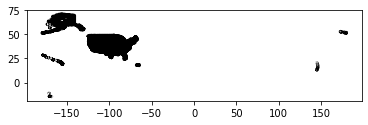

In [62]:
data_2.plot(facecolor='none',edgecolor='black',linewidth=3)

Let's look at what the geometry data we are going to merge in looks like by making a new dataframe that is only the 5-county Austin MSA region.

In [63]:
five_county_shp = data_2[(data_2["FIPS_int64"]==48453)|(data_2["FIPS_int64"]==48021)|
                        (data_2["FIPS_int64"]==48055)|(data_2["FIPS_int64"]==48209)|
                        (data_2["FIPS_int64"]==48491)]

In [64]:
five_county_shp.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [65]:
five_county_shp = five_county_shp.to_crs(epsg=3857)

<AxesSubplot:>

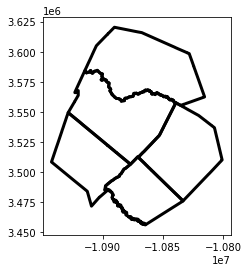

In [66]:
five_county_shp.plot(facecolor='none',edgecolor='black',linewidth=3)

## Merging Dataframes with Shapefiles for Mapping

In [67]:
diabetes_county = diabetes_clean.merge(data_2, left_on='FIPS_int64', right_on='FIPS_int64', how='left')

In [68]:
diabetes_county

,County,FIPS_int64,Number,Percentage,Rank,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,...,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,Anderson County,48001,4189,9.2,1486,48,001,01383786,48001,Anderson,...,G4020,None,37300,None,A,2752164826,39845046,+31.8412614,-095.6617267,"POLYGON ((-95.34248 31.71803, -95.34247 31.717..."
1,Andrews County,48003,878,7.1,817,48,003,01383787,48003,Andrews,...,G4020,None,11380,None,A,3886850259,957039,+32.3122581,-102.6402058,"POLYGON ((-102.21111 32.32368, -102.21111 32.3..."
2,Angelina County,48005,8900,14.2,2951,48,005,01383788,48005,Angelina,...,G4020,None,31260,None,A,2066460812,173300091,+31.2518963,-094.6111337,"POLYGON ((-94.45780 31.03333, -94.45782 31.033..."
3,Aransas County,48007,2543,13.4,2119,48,007,01383789,48007,Aransas,...,G4020,204,40530,None,A,652856780,714538201,+28.1226209,-096.9675012,"POLYGON ((-97.20401 28.08081, -97.19783 28.083..."
4,Archer County,48009,621,9.5,993,48,009,01383790,48009,Archer,...,G4020,None,48660,None,A,2339508155,57767717,+33.6163054,-098.6872669,"POLYGON ((-98.42311 33.67612, -98.42311 33.674..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood County,48499,3555,9.9,705,48,499,01384035,48499,Wood,...,G4020,None,None,None,A,1671172155,130731203,+32.7835881,-095.3821664,"POLYGON ((-95.15245 32.75959, -95.15245 32.759..."
250,Yoakum County,48501,428,7.7,801,48,501,01384036,48501,Yoakum,...,G4020,None,None,None,A,2071252479,34329,+33.1623386,-102.8322409,"POLYGON ((-102.59457 33.09681, -102.59458 33.0..."
251,Young County,48503,1329,10.0,1123,48,503,01384037,48503,Young,...,G4020,None,None,None,A,2368539757,42371869,+33.1587778,-098.6783895,"POLYGON ((-98.61774 33.39543, -98.61423 33.395..."
252,Zapata County,48505,681,7.5,613,48,505,01384038,48505,Zapata,...,G4020,None,49820,None,A,2585876042,154371160,+26.9969806,-099.1826027,"POLYGON ((-99.15217 27.27142, -99.15088 27.271..."


In [69]:
diabetes_county_shp = diabetes_county.filter(['County','FIPS_int64','Number','Percentage','Rank','geometry'],
                                             axis=1)

In [70]:
diabetes_county_shp

,County,FIPS_int64,Number,Percentage,Rank,geometry
0,Anderson County,48001,4189,9.2,1486,"POLYGON ((-95.34248 31.71803, -95.34247 31.717..."
1,Andrews County,48003,878,7.1,817,"POLYGON ((-102.21111 32.32368, -102.21111 32.3..."
2,Angelina County,48005,8900,14.2,2951,"POLYGON ((-94.45780 31.03333, -94.45782 31.033..."
3,Aransas County,48007,2543,13.4,2119,"POLYGON ((-97.20401 28.08081, -97.19783 28.083..."
4,Archer County,48009,621,9.5,993,"POLYGON ((-98.42311 33.67612, -98.42311 33.674..."
...,...,...,...,...,...,...
249,Wood County,48499,3555,9.9,705,"POLYGON ((-95.15245 32.75959, -95.15245 32.759..."
250,Yoakum County,48501,428,7.7,801,"POLYGON ((-102.59457 33.09681, -102.59458 33.0..."
251,Young County,48503,1329,10.0,1123,"POLYGON ((-98.61774 33.39543, -98.61423 33.395..."
252,Zapata County,48505,681,7.5,613,"POLYGON ((-99.15217 27.27142, -99.15088 27.271..."


In [72]:
diabetes_geo = gpd.GeoDataFrame(diabetes_county_shp, crs="EPSG:3857", geometry='geometry')

In [73]:
diabetes_geo.to_file('../data/diabetes_texas_counties.shp',index=False)

Text(0.5, 1.0, 'Proportion of Each County with Diabetes')

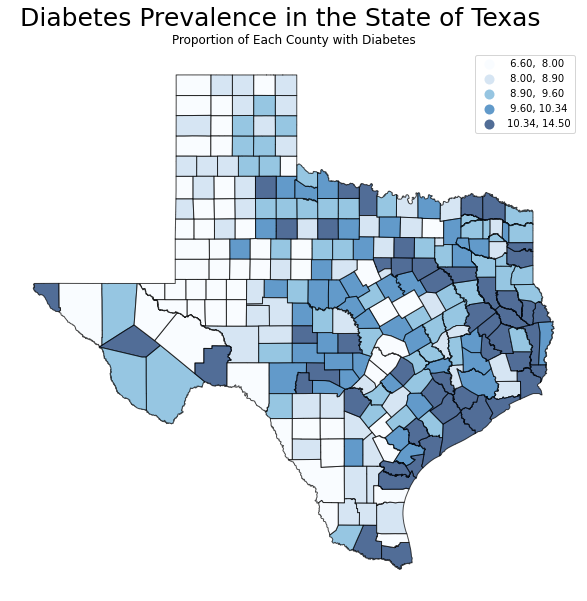

In [74]:
ax = diabetes_geo.plot(column='Percentage',
                        zorder=2,
                   figsize=(15, 10),
                   cmap='Blues',
                   scheme='quantiles',
                   edgecolor='black',
                        alpha=0.7,
                   legend=True)


ax.axis('off')
plt.suptitle('Diabetes Prevalence in the State of Texas',y=.94, fontsize=25)
plt.title('Proportion of Each County with Diabetes')

#plt.savefig('../images/texas_wide_diabetes_percentage_county_prevalence.jpg')